In [1032]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import NeuralNetwork as NN
import Layer
import importlib
importlib.reload(NN)
importlib.reload(Layer)

<module 'Layer' from '/Users/jorchard/Dropbox/research/peBogacz/python/Layer.py'>

In [1049]:
net = NN.NeuralNetwork()
l = Layer.InputPELayer(n=2)
net.AddLayer(l)
net.AddLayer(Layer.PELayer(n=2))
net.AddLayer(Layer.PELayer(n=2))
net.AddLayer(Layer.TopPELayer(n=2))

In [1050]:
net.SetIdentityWeights()
net.SetInput([1., 0])
net.SetExpectation([1., 0])
net.layers[1].v[0] = 1.

In [1051]:
net.ShowState()

Layer 0 (input):
  v = [1. 0.]
  e = [0. 0.]
Layer 1:
  v = [1. 0.]
  e = [0. 0.]
Layer 2:
  v = [0. 0.]
  e = [0. 0.]
Layer 3 (expectation):
  v = [1. 0.]


In [1052]:
net.ShowWeights()

  W01 = 
[[1. 0.]
 [0. 1.]]
  M10 = 
[[1. 0.]
 [0. 1.]]
  W12 = 
[[1. 0.]
 [0. 1.]]
  M21 = 
[[1. 0.]
 [0. 1.]]
  W23 = 
[[1. 0.]
 [0. 1.]]
  M32 = 
[[1. 0.]
 [0. 1.]]


In [1053]:
net.layers[-1].b = torch.zeros(2)
net.ShowBias()

  b = [0.2689 0.2689]
  b = [0.2689 0.2689]
  b = [0.2689 0.2689]
  b = [0. 0.]


In [1054]:
T = 3
dt = 0.001
tt = np.arange(0, T, dt)

In [1055]:
net.Run(T, dt=dt)
net.ShowState()

Layer 0 (input):
  v = [1. 0.]
  e = [-0.03442877 -0.18198039]
Layer 1:
  v = [ 1.0137633  -0.08690958]
  e = [-0.01403819 -0.18059476]
Layer 2:
  v = [ 0.9938446  -0.17628692]
  e = [-0.00585869 -0.17510942]
Layer 3 (expectation):
  v = [1. 0.]


In [1027]:
net.Integrate()

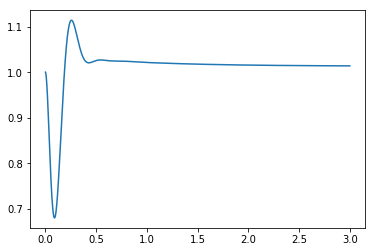

In [1057]:
plt.plot(np.array(net.t_history), np.array(net.layers[1].v_history)[:,0]);

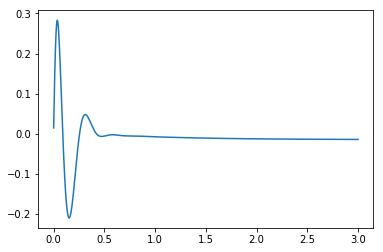

In [1058]:
plt.plot(np.array(net.t_history), np.array(net.layers[1].e_history)[:,0]);

In [1059]:
net.ShowWeights()

  W01 = 
[[ 9.9990231e-01 -1.0012755e-03]
 [ 1.1786724e-05  1.0000039e+00]]
  M10 = 
[[ 9.9990231e-01  1.1786724e-05]
 [-1.0012755e-03  1.0000039e+00]]
  W12 = 
[[ 9.9992430e-01 -9.5757178e-04]
 [ 9.9105291e-06  1.0001799e+00]]
  M21 = 
[[ 9.9992430e-01  9.9105291e-06]
 [-9.5757178e-04  1.0001799e+00]]
  W23 = 
[[ 0.9997169  -0.00120335]
 [ 0.          1.        ]]
  M32 = 
[[ 0.9997169   0.        ]
 [-0.00120335  1.        ]]
